In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-28.56231005654051, -31.013210758565492),
 (19.64908997644153, 54.767070833447946),
 (-1.035122059835203, 78.64029569581822),
 (-32.015806640033276, -8.965200303852555),
 (36.460275074089495, -52.171558942412446),
 (-13.93256817261971, 118.702234906174),
 (37.53312428687643, -113.17257867657126),
 (40.5263816378409, -42.88284483019822),
 (-82.88103003550319, 84.05891861903262),
 (69.70294957116025, -157.35263467818407),
 (73.28668901838597, -74.93449428892617),
 (45.74766653442779, 104.04383892232516),
 (31.00169991372789, 155.61640066459205),
 (69.94081991749977, -127.16833766964263),
 (68.4360936499896, 169.74794719285364),
 (-29.45067950054382, 176.64086081931418),
 (77.40292725887394, 16.64938626434602),
 (65.62177309770934, -57.088349210158924),
 (-23.07264588375932, -83.97630723175239),
 (-32.33847927951898, -92.55222753407163),
 (-41.544867831312494, 172.5491355370732),
 (-66.49092353898392, -161.0500815352276),
 (-31.45082121650296, 132.24692235824807),
 (89.81328071215663, 1

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao joao da barra
Processing Record 2 of Set 1 | salalah
Processing Record 3 of Set 1 | viligili
City not found. Skipping...
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | saint-pierre
Processing Record 6 of Set 1 | waingapu
Processing Record 7 of Set 1 | cedar city
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | clyde river
Processing Record 12 of Set 1 | hovd
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | norman wells
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | kaeo
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | sisimiut
Processing Record 19 of Set 1 | marcona
City not found. Skipping...
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | murchison
Processing Record 22 of Se

Processing Record 38 of Set 4 | novosheshminsk
Processing Record 39 of Set 4 | shenjiamen
Processing Record 40 of Set 4 | sabang
Processing Record 41 of Set 4 | melfort
Processing Record 42 of Set 4 | aykhal
Processing Record 43 of Set 4 | vrangel
Processing Record 44 of Set 4 | nouadhibou
Processing Record 45 of Set 4 | kaitangata
Processing Record 46 of Set 4 | komsomolskiy
Processing Record 47 of Set 4 | trelew
Processing Record 48 of Set 4 | mananjary
Processing Record 49 of Set 4 | ponta do sol
Processing Record 50 of Set 4 | deputatskiy
Processing Record 1 of Set 5 | okha
Processing Record 2 of Set 5 | karaul
City not found. Skipping...
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | kavieng
Processing Record 5 of Set 5 | padang
Processing Record 6 of Set 5 | severo-kurilsk
Processing Record 7 of Set 5 | paradwip
City not found. Skipping...
Processing Record 8 of Set 5 | changying
Processing Record 9 of Set 5 | the valley
Processing Record 10 of Set 5 | v

Processing Record 26 of Set 8 | kuche
City not found. Skipping...
Processing Record 27 of Set 8 | tessalit
Processing Record 28 of Set 8 | west wendover
Processing Record 29 of Set 8 | singleton
Processing Record 30 of Set 8 | galgani
City not found. Skipping...
Processing Record 31 of Set 8 | green river
Processing Record 32 of Set 8 | madaoua
Processing Record 33 of Set 8 | bosilovo
Processing Record 34 of Set 8 | monrovia
Processing Record 35 of Set 8 | dingle
Processing Record 36 of Set 8 | lovozero
Processing Record 37 of Set 8 | praia da vitoria
Processing Record 38 of Set 8 | uray
Processing Record 39 of Set 8 | cartagena del chaira
Processing Record 40 of Set 8 | miraflores
Processing Record 41 of Set 8 | bismil
Processing Record 42 of Set 8 | anar darreh
City not found. Skipping...
Processing Record 43 of Set 8 | lata
Processing Record 44 of Set 8 | casablanca
Processing Record 45 of Set 8 | college
Processing Record 46 of Set 8 | walvis bay
Processing Record 47 of Set 8 | la 

Processing Record 14 of Set 12 | esso
Processing Record 15 of Set 12 | constantine
Processing Record 16 of Set 12 | akom
Processing Record 17 of Set 12 | pagondas
City not found. Skipping...
Processing Record 18 of Set 12 | rovaniemi
Processing Record 19 of Set 12 | bakaly
Processing Record 20 of Set 12 | labutta
City not found. Skipping...
Processing Record 21 of Set 12 | arroyo
Processing Record 22 of Set 12 | vangaindrano
Processing Record 23 of Set 12 | rivadavia
Processing Record 24 of Set 12 | leh
Processing Record 25 of Set 12 | karamay
City not found. Skipping...
Processing Record 26 of Set 12 | plettenberg bay
Processing Record 27 of Set 12 | prince rupert
Processing Record 28 of Set 12 | peleduy
Processing Record 29 of Set 12 | asfi
Processing Record 30 of Set 12 | tianpeng
Processing Record 31 of Set 12 | thinadhoo
Processing Record 32 of Set 12 | nemuro
Processing Record 33 of Set 12 | anloga
Processing Record 34 of Set 12 | sarmanovo
Processing Record 35 of Set 12 | peace 

In [8]:
len(city_data)

559

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Joao Da Barra,-21.6403,-41.0511,76.69,86,13,10.56,BR,2022-04-27 21:00:39
1,Salalah,17.0151,54.0924,80.69,81,22,3.47,OM,2022-04-27 21:00:48
2,Jamestown,42.0970,-79.2353,32.02,63,100,12.66,US,2022-04-27 21:00:48
3,Saint-Pierre,-21.3393,55.4781,73.08,71,0,8.05,RE,2022-04-27 21:00:49
4,Waingapu,-9.6567,120.2641,74.32,82,99,3.94,ID,2022-04-27 21:00:49
5,Cedar City,37.6775,-113.0619,70.39,14,1,15.30,US,2022-04-27 21:00:19
6,Torbay,47.6666,-52.7314,45.28,86,100,1.99,CA,2022-04-27 21:00:50
7,Busselton,-33.6500,115.3333,60.89,79,77,15.43,AU,2022-04-27 21:00:50
8,Barrow,71.2906,-156.7887,6.82,78,100,14.97,US,2022-04-27 21:00:50
9,Clyde River,70.4692,-68.5914,13.17,88,100,4.70,CA,2022-04-27 21:00:51


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [11]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Joao Da Barra,BR,2022-04-27 21:00:39,-21.6403,-41.0511,76.69,86,13,10.56
1,Salalah,OM,2022-04-27 21:00:48,17.0151,54.0924,80.69,81,22,3.47
2,Jamestown,US,2022-04-27 21:00:48,42.0970,-79.2353,32.02,63,100,12.66
3,Saint-Pierre,RE,2022-04-27 21:00:49,-21.3393,55.4781,73.08,71,0,8.05
4,Waingapu,ID,2022-04-27 21:00:49,-9.6567,120.2641,74.32,82,99,3.94
5,Cedar City,US,2022-04-27 21:00:19,37.6775,-113.0619,70.39,14,1,15.30
6,Torbay,CA,2022-04-27 21:00:50,47.6666,-52.7314,45.28,86,100,1.99
7,Busselton,AU,2022-04-27 21:00:50,-33.6500,115.3333,60.89,79,77,15.43
8,Barrow,US,2022-04-27 21:00:50,71.2906,-156.7887,6.82,78,100,14.97
9,Clyde River,CA,2022-04-27 21:00:51,70.4692,-68.5914,13.17,88,100,4.70


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

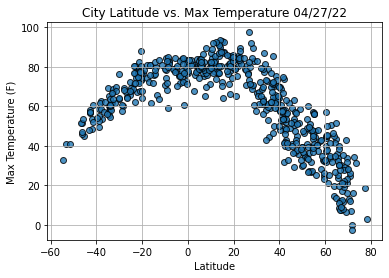

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

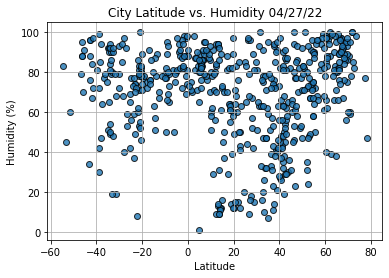

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

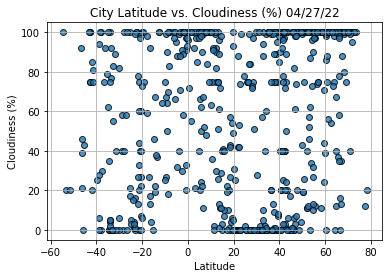

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

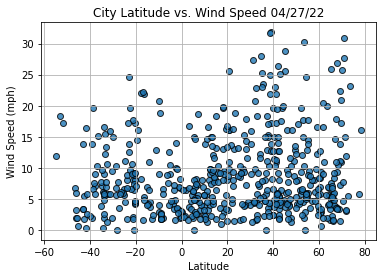

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                        Pevek
Country                        RU
Date          2022-04-27 21:00:52
Lat                       69.7008
Lng                      170.3133
Max Temp                     33.8
Humidity                       75
Cloudiness                    100
Wind Speed                  17.27
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
554     True
555    False
556     True
557     True
558    False
Name: Lat, Length: 559, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Salalah,OM,2022-04-27 21:00:48,17.0151,54.0924,80.69,81,22,3.47
2,Jamestown,US,2022-04-27 21:00:48,42.0970,-79.2353,32.02,63,100,12.66
5,Cedar City,US,2022-04-27 21:00:19,37.6775,-113.0619,70.39,14,1,15.30
6,Torbay,CA,2022-04-27 21:00:50,47.6666,-52.7314,45.28,86,100,1.99
8,Barrow,US,2022-04-27 21:00:50,71.2906,-156.7887,6.82,78,100,14.97
...,...,...,...,...,...,...,...,...,...
552,Boden,SE,2022-04-27 21:16:10,65.8252,21.6886,30.20,81,35,5.32
553,Abbeville,FR,2022-04-27 21:16:10,50.1000,1.8333,47.50,83,19,12.17
554,Turkistan,KZ,2022-04-27 21:16:10,43.0000,68.0000,63.32,29,50,25.17
556,Ustye,RU,2022-04-27 21:16:11,59.6304,39.7360,26.08,82,44,6.64


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Salalah,OM,2022-04-27 21:00:48,17.0151,54.0924,80.69,81,22,3.47
2,Jamestown,US,2022-04-27 21:00:48,42.0970,-79.2353,32.02,63,100,12.66
5,Cedar City,US,2022-04-27 21:00:19,37.6775,-113.0619,70.39,14,1,15.30
6,Torbay,CA,2022-04-27 21:00:50,47.6666,-52.7314,45.28,86,100,1.99
8,Barrow,US,2022-04-27 21:00:50,71.2906,-156.7887,6.82,78,100,14.97


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

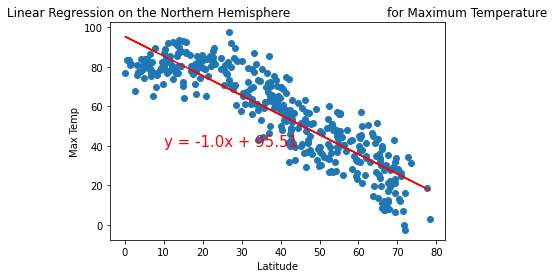

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

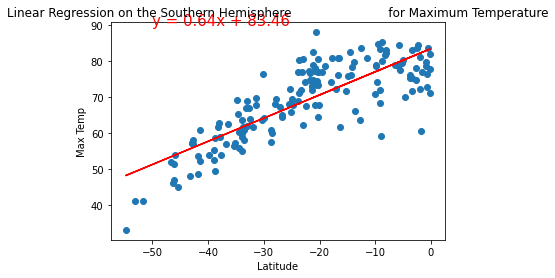

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

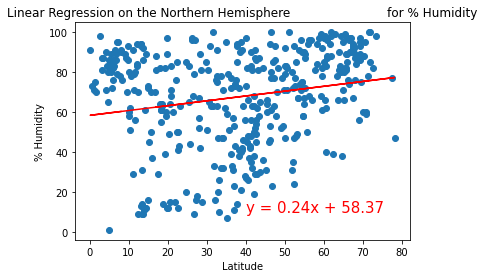

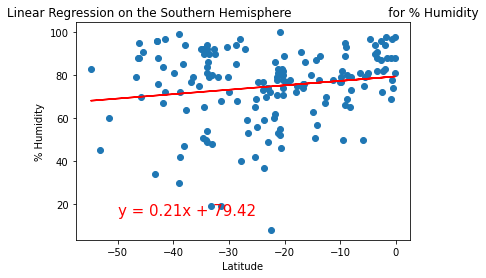

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

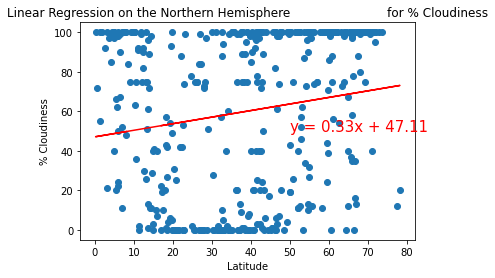

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,50))

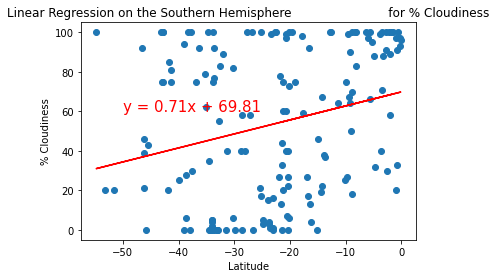

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

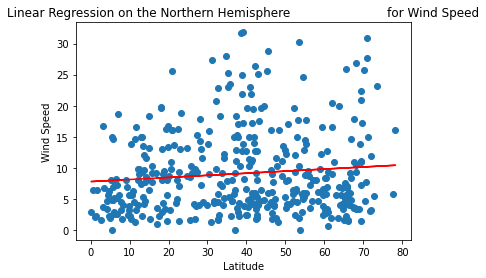

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))